In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import json


Load the Dataset and clean it while only extracting the song features: tempo, energy, loudness and valence. 

In [2]:
file_path = '../Spotify_Song_Attributes.csv'

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Select the columns you want
song_attributes = ['id', 'tempo', 'energy', 'loudness', 'valence']
df_filtered = df[song_attributes]

# Drop rows with missing values
df_filtered = df_filtered.dropna(subset=['tempo', 'energy', 'loudness', 'valence'])

# Display the filtered DataFrame
df_filtered.head()


,id,tempo,energy,loudness,valence
0,7dTxqsaFGHOXwtzHINjfHv,162.139,0.799,-4.939,0.577
1,14Qcrx6Dfjvcj0H8oV8oUW,112.241,0.130,-17.719,0.122
2,7K9Z3yFNNLv5kwTjQYGjnu,132.012,0.814,-3.788,0.509
3,3koAwrM1RO0TGMeQJ3qt9J,120.969,0.596,-9.804,0.896
4,4ByEFOBuLXpCqvO1kw8Wdm,124.945,0.726,-11.402,0.507


Standardize the song attributes, appling KMeans clustering to categorize songs into three intensity clusters: low, mid, high intensity. 

Visualize the clusters on a scatter plot.

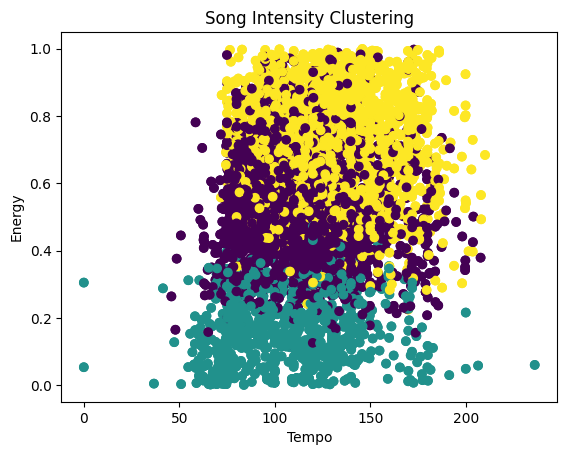

                       id    tempo  energy  loudness  valence  intensity
0  7dTxqsaFGHOXwtzHINjfHv  162.139   0.799    -4.939    0.577          2
1  14Qcrx6Dfjvcj0H8oV8oUW  112.241   0.130   -17.719    0.122          1
2  7K9Z3yFNNLv5kwTjQYGjnu  132.012   0.814    -3.788    0.509          2
3  3koAwrM1RO0TGMeQJ3qt9J  120.969   0.596    -9.804    0.896          2
4  4ByEFOBuLXpCqvO1kw8Wdm  124.945   0.726   -11.402    0.507          2


In [3]:
# prepare data for clustering (use features only)
X = df_filtered[['tempo', 'energy', 'loudness', 'valence']]

# standardize the data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# apply KMeans clustering (use 3 clusters for low, mid, high intensity)
kmeans = KMeans(n_clusters=3, random_state=42)
df_filtered['intensity'] = kmeans.fit_predict(X_scaled)

# visualize the clusters 
plt.scatter(df_filtered['tempo'], df_filtered['energy'], c=df_filtered['intensity'], cmap='viridis')
plt.xlabel('Tempo')
plt.ylabel('Energy')
plt.title('Song Intensity Clustering')
plt.show()

print(df_filtered.head())

Remove the 'intensity' and 'id' columns. 

Standardize the remaining features, and then split the dataset into training and test sets with 80% for training and 20% for testing.

In [4]:
X = df_filtered.drop(['intensity', 'id'], axis=1).values
y = df_filtered['intensity'].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)



Build a neural network with one hidden layer that uses ReLU activation for the hidden layer and softmax for the output layer. 

Initialize the weights with He initialization, compute forward and backward passes, and update the weights using gradient descent. 

After training, evaluate the model's accuracy on the test data and output the classification.

In [5]:
from model import NeuralNetwork

nn = NeuralNetwork(input_size=X_train.shape[1], hidden_size=64, output_size=len(np.unique(y_train)))
nn.train(X_train, y_train, learning_rate=0.0001, epochs=1000)

# evaluate on test data
predictions = nn.predict(X_test)
accuracy = np.mean(predictions == y_test) * 100  
print(f"Accuracy on test data: {accuracy:.2f}%")

Epoch 0/1000, Loss: 1.838149913499432
Epoch 1/1000, Loss: 0.8747800011256128
Epoch 2/1000, Loss: 0.5253149203126647
Epoch 3/1000, Loss: 0.6806372938835709
Epoch 4/1000, Loss: 0.2232912513328641
Epoch 5/1000, Loss: 0.1745021449929075
Epoch 6/1000, Loss: 0.16107616209641193
Epoch 7/1000, Loss: 0.1544244756395608
Epoch 8/1000, Loss: 0.14975122921447026
Epoch 9/1000, Loss: 0.1460034574218939
Epoch 10/1000, Loss: 0.1427756546042437
Epoch 11/1000, Loss: 0.1398846715707893
Epoch 12/1000, Loss: 0.13723490495235452
Epoch 13/1000, Loss: 0.1347658117466416
Epoch 14/1000, Loss: 0.1324399307608033
Epoch 15/1000, Loss: 0.13023853220048584
Epoch 16/1000, Loss: 0.1281491894976069
Epoch 17/1000, Loss: 0.12615374412290614
Epoch 18/1000, Loss: 0.12423712014565333
Epoch 19/1000, Loss: 0.12240114415878421
Epoch 20/1000, Loss: 0.12063264067050711
Epoch 21/1000, Loss: 0.11892487355239766
Epoch 22/1000, Loss: 0.1172882832487807
Epoch 23/1000, Loss: 0.1157152001809428
Epoch 24/1000, Loss: 0.11420321192140483
E

Save the weights and biases of the neural network to a json file.

In [8]:
nn.save_model("saved_nn.json")

Evaluate the model's performance using a confusion matrix

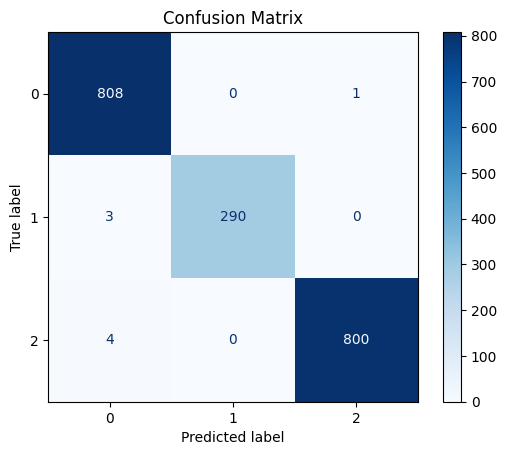

In [9]:
y_pred = nn.predict(X_test)

# generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()